## Heart Disease Prediction (Binary Classification)

An attempt to build a machine learning model capable of predicting (based on their medical attributes) whether someone has heart disease or not.

**The approach:**
1. Problem Definition
2. Data Analysis:
  - Data
  - Evaluation
  - Features
3. Modeling
4. Experiment

---

## 1. Problem Definition

In a statement,
> Given medical attributes (clinical parameters) of a patient, can we predict whether that patient has heart disease or not?

---

## 2. Data Analysis

#### 2.1 Data

**Original Data is from:** https://archive.ics.uci.edu/ml/datasets/heart+disease

**We used the dataset of:** https://www.kaggle.com/ronitf/heart-disease-uci

**Attribute Information:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

#### 2.3 Features

1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (non heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
  - serum = LDL + HDL + .2 * triglycerides
  - above 200 is cause for concern
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - '>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
  - 0: Nothing to note
  - 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
  - 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excerci
11. **slope** - the slope of the peak exercise ST segment
  - 0: Upsloping: better heart rate with excercise (uncommon)
  - 1: Flatsloping: minimal change (typical healthy heart)
  - 2: Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
  - colored vessel means the doctor can see the blood passing through
  - the more blood movement the better (no clots)
13. **thal** - thalium stress result
  - 1,3: normal
  - 6: fixed defect: used to be defect but ok now
  - 7: reversable defect: no proper blood movement when excercising
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### Import Library Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

#### Data Exploration

Find out more about the data

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. How to deal with missing data?
4. Where are the outliers and how to deal?
5. How to add, modify or remove features to get more out of the data?

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Naimul-Islam-Siam/Heart-Disease-Prediction/master/heart-disease.csv")
df. head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

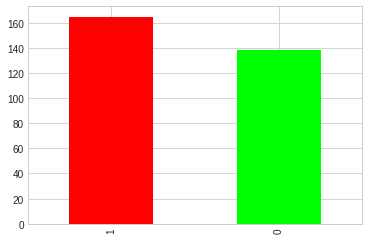

In [5]:
df["target"].value_counts().plot.bar(color=["red", "lime"]);

**Sex vs Heart Disease**

In [6]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


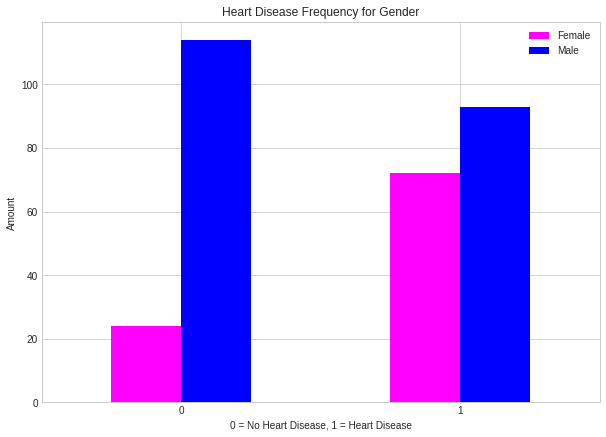

In [7]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["magenta", "blue"], figsize=(10, 7))
plt.legend(["Female", "Male"])
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [8]:
print(f"Based on THIS data, a female has {(72/(72+24))*100:.2f}% probability of having heart disease")
print(f"Based on THIS data, a male has {(93/(114+93))*100:.2f}% probability of having heart disease")

Based on THIS data, a female has 75.00% probability of having heart disease
Based on THIS data, a male has 44.93% probability of having heart disease


**Age vs Max Heart Rate**

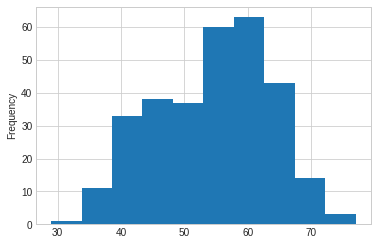

In [9]:
df["age"].plot.hist();

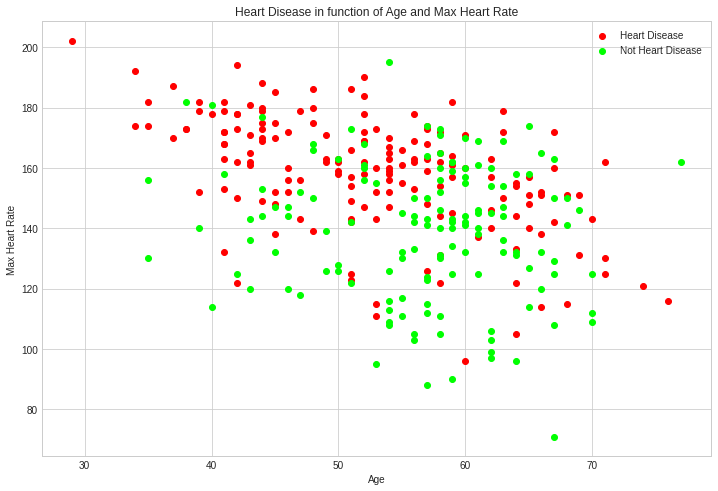

In [10]:
plt.figure(figsize=(12, 8))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="red")

plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="lime")

plt.legend(["Heart Disease", "Not Heart Disease"])

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

plt.title("Heart Disease in function of Age and Max Heart Rate");

**Heart Disease Type per Chest Pain Type**

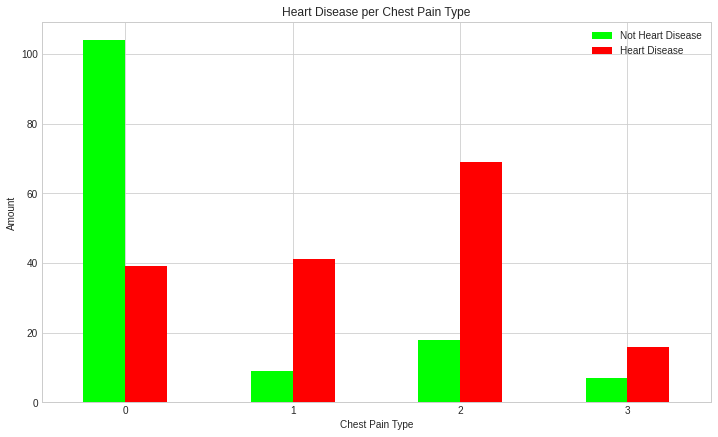

In [11]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", color=["lime", "red"], figsize=(12, 7))

plt.legend(["Not Heart Disease", "Heart Disease"])

plt.title("Heart Disease per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

**Correlation Matrix**

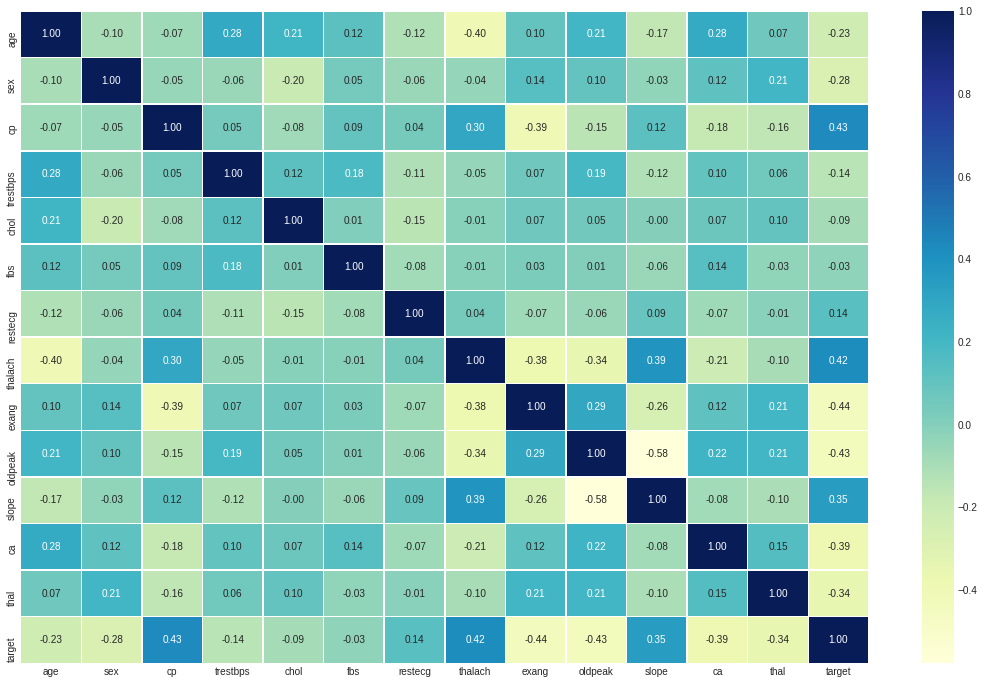

In [12]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(19, 12))

ax = sns.heatmap(corr_matrix, fmt=".2f", annot=True, cmap="YlGnBu", linewidths=0.5);

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 

It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

The diagonal of the table is always a set of ones, because the correlation between a variable and itself is always 1, which shows that each variable always perfectly correlates with itself.

It has a value between -1 and 1 where:
- -1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- 1 indicates a perfectly positive linear correlation between two variables
- Values between 0.7 and 1.0 (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.
- Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated
- Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation


---

## 3. Modeling

In [13]:
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test)

(242, 61)

In [14]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [15]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


**We're going to try 3 different models:**
1. Logistic Regression
2. k-nearest Neighbours Classifier
3. Random Forest Classifier

We chose these 3 based on this scikit-learn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Logistic Regression, despite its name, is a linear model for classification rather than regression. (https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [16]:
models = {"LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RFC": RandomForestClassifier()}

# Create a function to fit and evaluate a model
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_scores = {}

  # loop through every model of models dictionary
  for name, model in models.items():
    model.fit(X_train, y_train)

    model_scores[name] = model.score(X_test, y_test)

  return model_scores

In [17]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
model_scores

{'KNN': 0.6885245901639344,
 'LR': 0.8852459016393442,
 'RFC': 0.8360655737704918}

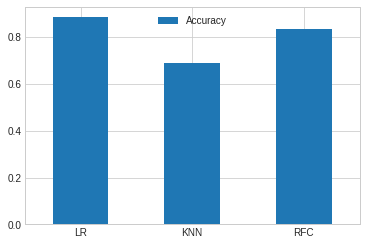

In [19]:
model_comparison = pd.DataFrame(model_scores, index=["Accuracy"])

model_comparison.T.plot.bar()

plt.xticks(rotation=0);

---

## 4. Experiment

**Now Let's look at the following:**
1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Cross-validation
5. Precision
6. Recall
7. F1-score
8. Classification Report
9. ROC Curve
9. AUC

#### 4.1 Hyperparameter Tuning:
1. By Hand
2. Using `RandomizedSearchCV()`
3. Using `GridSearchCV()`

#### 4.1.1 Hyperparameter Tuning By Hand

In [20]:
# Let's Tune KNN

train_scores = []
test_scores = []

neighbours = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbours:
  knn.set_params(n_neighbors = i)

  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

Maximum Test Score on KNN test data: 75.41%


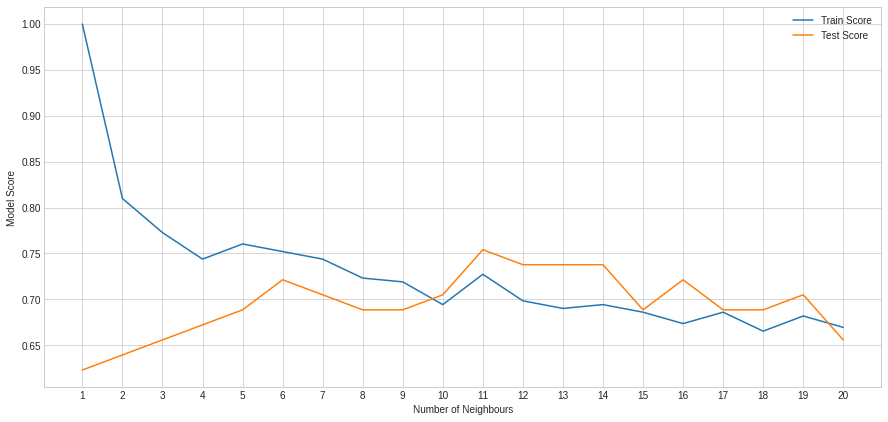

In [22]:
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, test_scores, label="Test Score")

plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")

plt.legend()

plt.xticks(np.arange(1, 21, 1))

plt.rcParams["figure.figsize"] = (15,7)

print(f"Maximum Test Score on KNN test data: {max(test_scores) * 100:.2f}%");

#### 4.1.2 Hyperparameter Tuning Using `RandomizedSearchCV()`

In [28]:
# Let's create hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Let's create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(2, 20, 2)}

In [ ]:
np.random.seed(42)

# Setup hyperparameter tuning using RandomizedSearchCV for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit model
rs_log_reg.fit(X_train, y_train)

In [25]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [26]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
np.random.seed(42)

# Setup hyperparameter tuning using RandomizedSearchCV for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# Fit model
rs_rf.fit(X_train, y_train)

In [31]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 18,
 'min_samples_split': 12,
 'n_estimators': 560}

In [30]:
rs_rf.score(X_test, y_test)

0.8688524590163934

#### 4.1.3 Hyperparameter Tuning Using `GridSearchCV()`

In [33]:
# Let's create hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Setup hyperparameter tuning using GridSearchCV for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

In [ ]:
gs_log_reg.fit(X_train, y_train)

In [35]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442